In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import os

import yaml

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import galcheat
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import maddeb.boxplot
from maddeb.utils import get_maddeb_config_path

mpl.rcParams["text.usetex"] = True
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage{bm} \usepackage{amsmath}"  # for \text command

In [ ]:
with open(get_maddeb_config_path()) as f:
    maddeb_config = yaml.safe_load(f)

In [ ]:
survey = galcheat.get_survey(maddeb_config["survey_name"])

In [ ]:
def format_func(value, tick_number):
    # Format the y-axis labels as integers without decimals
    return "{:.3f}".format(value)

In [ ]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

## load the saved results

In [ ]:
density_level = "high"

In [ ]:
data_path = os.path.join(
    maddeb_config["RESULTS_PATH"][maddeb_config["survey_name"]],
    density_level + "_density",
)
run_name = "kl2"  # 12 to 20 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [ ]:
scarlet_plot_color = sns.color_palette("colorblind")[4]
madness_plot_color = sns.color_palette("colorblind")[0]
debvader_plot_color = sns.color_palette("colorblind")[2]

isolated_plot_color = sns.color_palette("colorblind")[6]
blended_plot_color = sns.color_palette("colorblind")[1]

madness_plot_ls = "dashdot"
debvader_plot_ls = "dotted"
scarlet_plot_ls = "-"

isolated_plot_ls = "dotted"
blended_plot_ls = "--"

scarlet_plot_label = r"\texttt{scarlet}"
madness_plot_label = r"\texttt{MADNESS}"
debvader_plot_label = r"\texttt{VAE-deblender}"

In [ ]:
# for file_num in range(200):

#     scarlet_res = pd.read_pickle(
#             os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")
#         )
#     madness_res = pd.read_pickle(
#             os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")
#         )
#     scarlet_res["r_blendedness"] = madness_res["r_blendedness"].values
#     scarlet_res.to_pickle(os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl"))

In [ ]:
madness_results = []
debvader_results = []
scarlet_results = []
actual_photometry = []
blended_photometry = []

for file_num in range(300):

    madness_results.append(
        pd.read_pickle(
            os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")
        )
    )
    debvader_results.append(
        pd.read_pickle(
            os.path.join(result_dir_path, "debvader_results", str(file_num) + ".pkl")
        )
    )
    scarlet_results.append(
        pd.read_pickle(
            os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")
        )
    )

    actual_photometry.append(
        pd.read_pickle(
            os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")
        )
    )
    blended_photometry.append(
        pd.read_pickle(
            os.path.join(data_path, "blended_photometry", str(file_num) + ".pkl")
        )
    )

madness_results = pd.concat(madness_results)
debvader_results = pd.concat(debvader_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [ ]:
mask_contamination = madness_results["r_contamination"].values < 5
madness_results = madness_results[mask_contamination]
scarlet_results = scarlet_results[mask_contamination]
debvader_results = debvader_results[mask_contamination]
actual_photometry = actual_photometry[mask_contamination]
blended_photometry = blended_photometry[mask_contamination]

In [ ]:
madness_results

,u_cosd,u_ssim,u_blendedness,g_cosd,g_ssim,g_blendedness,r_cosd,r_ssim,r_blendedness,i_cosd,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.996138,0.999453,0.001075,0.997346,0.999568,0.001551,0.997073,0.999518,0.002528,0.997236,...,4.177191e+04,3385.314683,0,2.878956e+04,3868.829280,0,9.744769e+03,4095.801120,0,0.001494
1,0.984767,0.994460,0.007501,0.998854,0.999592,0.011518,0.999522,0.999693,0.012282,0.999607,...,4.967173e+05,6389.319826,0,4.094918e+05,7416.321374,0,2.208194e+05,7915.768642,0,0.012469
2,0.288979,0.985649,0.062549,0.991930,0.996241,0.020887,0.997515,0.998739,0.012057,0.996779,...,4.658063e+04,5557.844806,0,2.821307e+04,6445.985095,0,2.929341e+04,6886.920907,0,0.005841
3,0.983109,0.998227,0.243462,0.991204,0.999489,0.273820,0.989849,0.999386,0.311372,0.991035,...,4.537337e+04,3803.906302,0,3.203045e+04,4385.052465,0,1.424683e+04,4655.811139,0,0.520180
4,0.976159,0.989793,0.055397,0.999198,0.998982,0.114234,0.999549,0.999614,0.065793,0.999573,...,3.347568e+05,6753.887067,0,2.377766e+05,7836.329386,0,1.339653e+05,8380.241426,0,0.086668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.982008,0.998600,0.033885,0.995154,0.999010,0.046567,0.995859,0.999402,0.048599,0.995264,...,2.290588e+04,3191.502499,0,1.676711e+04,3655.930369,0,5.817559e+03,3870.121993,0,0.059461
305,0.727774,0.955526,0.072228,0.907420,0.958432,0.062242,0.893931,0.957092,0.096305,0.909162,...,4.745613e+04,3561.565934,0,2.472010e+04,4085.317023,0,1.811122e+04,4347.075559,0,0.123139
306,0.985284,0.960123,0.002619,0.997880,0.980285,0.002130,0.998188,0.982376,0.001209,0.998168,...,1.411218e+07,14553.388368,0,1.049015e+07,17014.887752,0,5.554963e+06,18222.735500,0,0.004554
308,0.112208,0.936115,0.483493,0.480245,0.940227,0.486689,0.508873,0.941194,0.629800,0.517663,...,1.180473e+05,7207.023040,0,9.383851e+04,8397.764862,0,4.424102e+04,8980.726951,0,2.665380


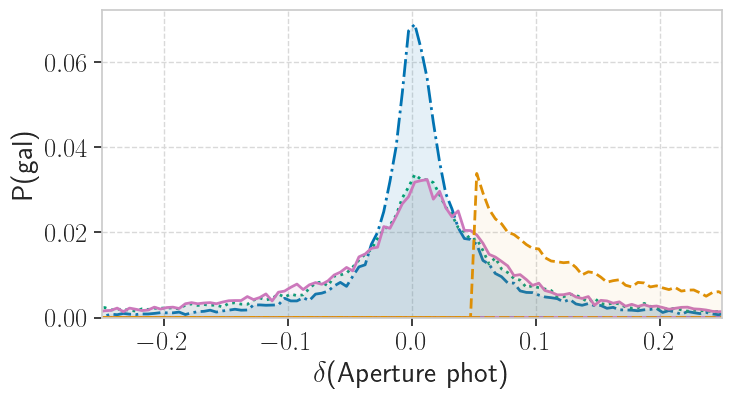

In [ ]:
band = "r"
mask = madness_results["r_contamination"] > 0.05
bins = np.arange(-10, 10, 0.005)


plt.figure(figsize=(8, 4))
sns.set(font_scale=1.75)
sns.set_style("whitegrid", {"grid.color": ".85", "grid.linestyle": "--"})
madness_rel_aper_phot_err = (
    madness_results[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1
)
sns.histplot(
    madness_results[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1,
    bins=bins,
    label=madness_plot_label,
    color=madness_plot_color,
    alpha=0.1,
    element="poly",
    stat="probability",
    ls=madness_plot_ls,
    lw=2,
)
# print(np.sqrt(np.sum((madness_rel_aper_phot_err - np.mean(madness_rel_aper_phot_err))**2)/len(madness_rel_aper_phot_err)))
# hist, bin_tmp = np.histogram((madness_results[band+"_phot_flux"].values[mask] / actual_photometry[band+"_phot_flux"].values[mask] - 1), bins, density=True)
# bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
# res = curve_fit(gauss, bins, hist, p0=[.001, 0])
# print(res[0])
# plt.plot(bins, gauss(bins, res[0][0], res[0][1]))


sns.histplot(
    debvader_results[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1,
    bins=bins,
    label=debvader_plot_label,
    color=debvader_plot_color,
    alpha=0.1,
    element="poly",
    stat="probability",
    ls=debvader_plot_ls,
    lw=2,
)
scarlet_rel_aper_phot_err = (
    scarlet_results[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1
)
sns.histplot(
    scarlet_results[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1,
    bins=bins,
    label=scarlet_plot_label,
    color=scarlet_plot_color,
    alpha=0.1,
    element="poly",
    stat="probability",
    ls=scarlet_plot_ls,
    lw=2,
)
sns.histplot(
    blended_photometry[band + "_phot_flux"].values[mask]
    / actual_photometry[band + "_phot_flux"].values[mask]
    - 1,
    bins=bins,
    label="blended",
    color=blended_plot_color,
    alpha=0.05,
    element="poly",
    stat="probability",
    ls=blended_plot_ls,
    lw=2,
)
ax = plt.gca()
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

plt.xlabel(r"$\delta$(Aperture phot)")
plt.ylabel("P(gal)")
plt.xlim(-0.25, 0.25)
plt.legend(loc="upper left")
ax.legend().remove()

plt.savefig(
    os.path.join("results", density_level + "_density", "aper_phot_distrib_" + band),
    bbox_inches="tight",
)
plt.savefig(
    os.path.join(
        "results", density_level + "_density", "aper_phot_distrib_" + band + ".pdf"
    ),
    format="pdf",
    bbox_inches="tight",
)

# Pixel Cosine Distance

In [ ]:
bins = np.arange(0, 1, 0.0002)
for band_number, band in enumerate(survey.available_filters):
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1.75)
    sns.set_style("whitegrid", {"grid.color": ".85", "grid.linestyle": "--"})
    mask = (
        actual_photometry[band + "_phot_flux"].values
        / actual_photometry[band + "_phot_fluxerrs"].values
    ) > 5
    sns.histplot(
        madness_results[mask][band + "_cosd"].values,
        bins=bins,
        alpha=0.05,
        label=madness_plot_label,
        color=madness_plot_color,
        element="poly",
        stat="probability",
        ls=madness_plot_ls,
        lw=2,
    )
    sns.histplot(
        debvader_results[mask][band + "_cosd"].values,
        bins=bins,
        alpha=0.05,
        label=debvader_plot_label,
        color=debvader_plot_color,
        element="poly",
        stat="probability",
        ls=debvader_plot_ls,
        lw=2,
    )
    sns.histplot(
        scarlet_results[mask][band + "_cosd"].values,
        bins=bins,
        alpha=0.05,
        label=scarlet_plot_label,
        color=scarlet_plot_color,
        element="poly",
        stat="probability",
        ls=scarlet_plot_ls,
        lw=2,
    )
    plt.legend(title=band + "-filter", loc="upper left")
    ax = plt.gca()

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    if band != "u":
        ax.get_legend().remove()
    plt.xlim([0.975, 1])
    plt.ylim([0, 0.15])
    plt.xlabel(r"Cosine similarity($S_c$)")
    plt.ylabel("P(gal)")

    plt.tight_layout()
    # plt.savefig(result_dir_path + "/cosd_res_"+band)
    plt.savefig(
        os.path.join("results", density_level + "_density", "cosd_res_" + band),
        bbox_inches="tight",
    )
    plt.savefig(
        os.path.join(
            "results", density_level + "_density", "cosd_res_" + band + ".pdf"
        ),
        format="pdf",
        bbox_inches="tight",
    )
    plt.close()

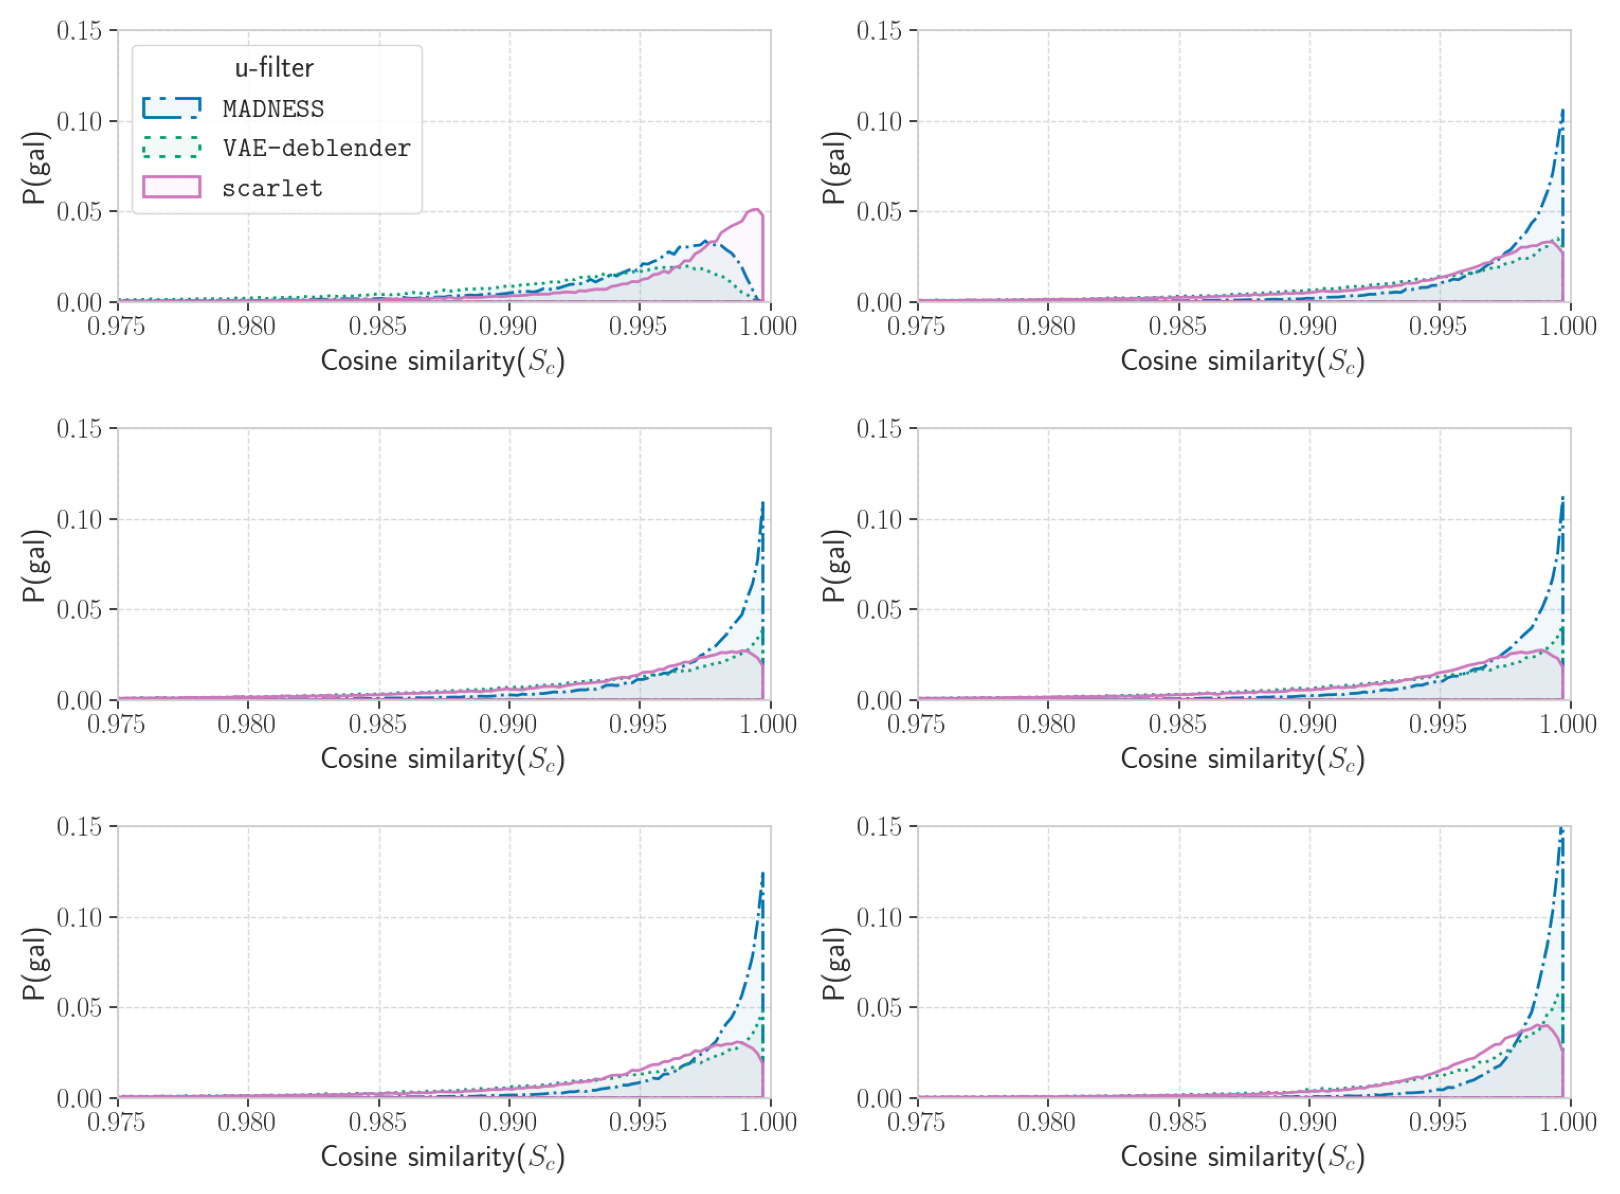

In [ ]:
f, axarr = plt.subplots(3, 2, figsize=(16, 12))

for band_num, band in enumerate(survey.available_filters):
    # axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
    axarr[int(band_num / 2)][band_num % 2].imshow(
        mpimg.imread(
            os.path.join("results", density_level + "_density", f"cosd_res_{band}.png")
        )
    )

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout(pad=0)


plt.savefig(
    os.path.join("results", density_level + "_density", "cosd_res.pdf"),
    format="pdf",
    bbox_inches="tight",
    dpi=1200,
)
plt.savefig(os.path.join("results", density_level + "_density", "cosd_res.png"))

plt.show()

# SSIM

In [ ]:
np.amin(debvader_results[mask][band + "_ssim"].values)

0.4297935664178442

In [ ]:
bins = np.arange(-1, 1, 0.00002)
for band_number, band in enumerate(survey.available_filters):
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    # ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(f'{{x:.3f}}'))
    sns.set(font_scale=1.75)
    sns.set_style("whitegrid", {"grid.color": ".85", "grid.linestyle": "--"})
    mask = (
        actual_photometry[band + "_phot_flux"].values
        / actual_photometry[band + "_phot_fluxerrs"].values
    ) > 5
    sns.histplot(
        madness_results[mask][band + "_ssim"].values,
        bins=bins,
        alpha=0.05,
        label=madness_plot_label,
        color=madness_plot_color,
        element="poly",
        stat="probability",
        ls=madness_plot_ls,
        lw=2,
    )
    sns.histplot(
        debvader_results[mask][band + "_ssim"].values,
        bins=bins,
        alpha=0.05,
        label=debvader_plot_label,
        color=debvader_plot_color,
        element="poly",
        stat="probability",
        ls=debvader_plot_ls,
        lw=2,
    )
    sns.histplot(
        scarlet_results[mask][band + "_ssim"].values,
        bins=bins,
        alpha=0.05,
        label=scarlet_plot_label,
        color=scarlet_plot_color,
        element="poly",
        stat="probability",
        ls=scarlet_plot_ls,
        lw=2,
    )
    plt.legend(title=band + "-filter", loc="upper left")
    ax = plt.gca()
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    if band != "u":
        ax.get_legend().remove()
    plt.xlim([0.9975, 1])
    plt.ylim([0, 0.075])
    plt.xlabel("SSIM")
    plt.ylabel("p(gal)")
    plt.tight_layout()
    # plt.savefig(result_dir_path + "/cosd_res_"+band)
    plt.savefig(
        os.path.join("results", density_level + "_density", "ssim_res_" + band),
        bbox_inches="tight",
    )
    plt.savefig(
        os.path.join(
            "results", density_level + "_density", "ssim_res_" + band + ".pdf"
        ),
        format="pdf",
        bbox_inches="tight",
    )
    plt.close()

In [ ]:
mask = (
    actual_photometry["u_phot_flux"].values
    / actual_photometry["u_phot_fluxerrs"].values
) > 3

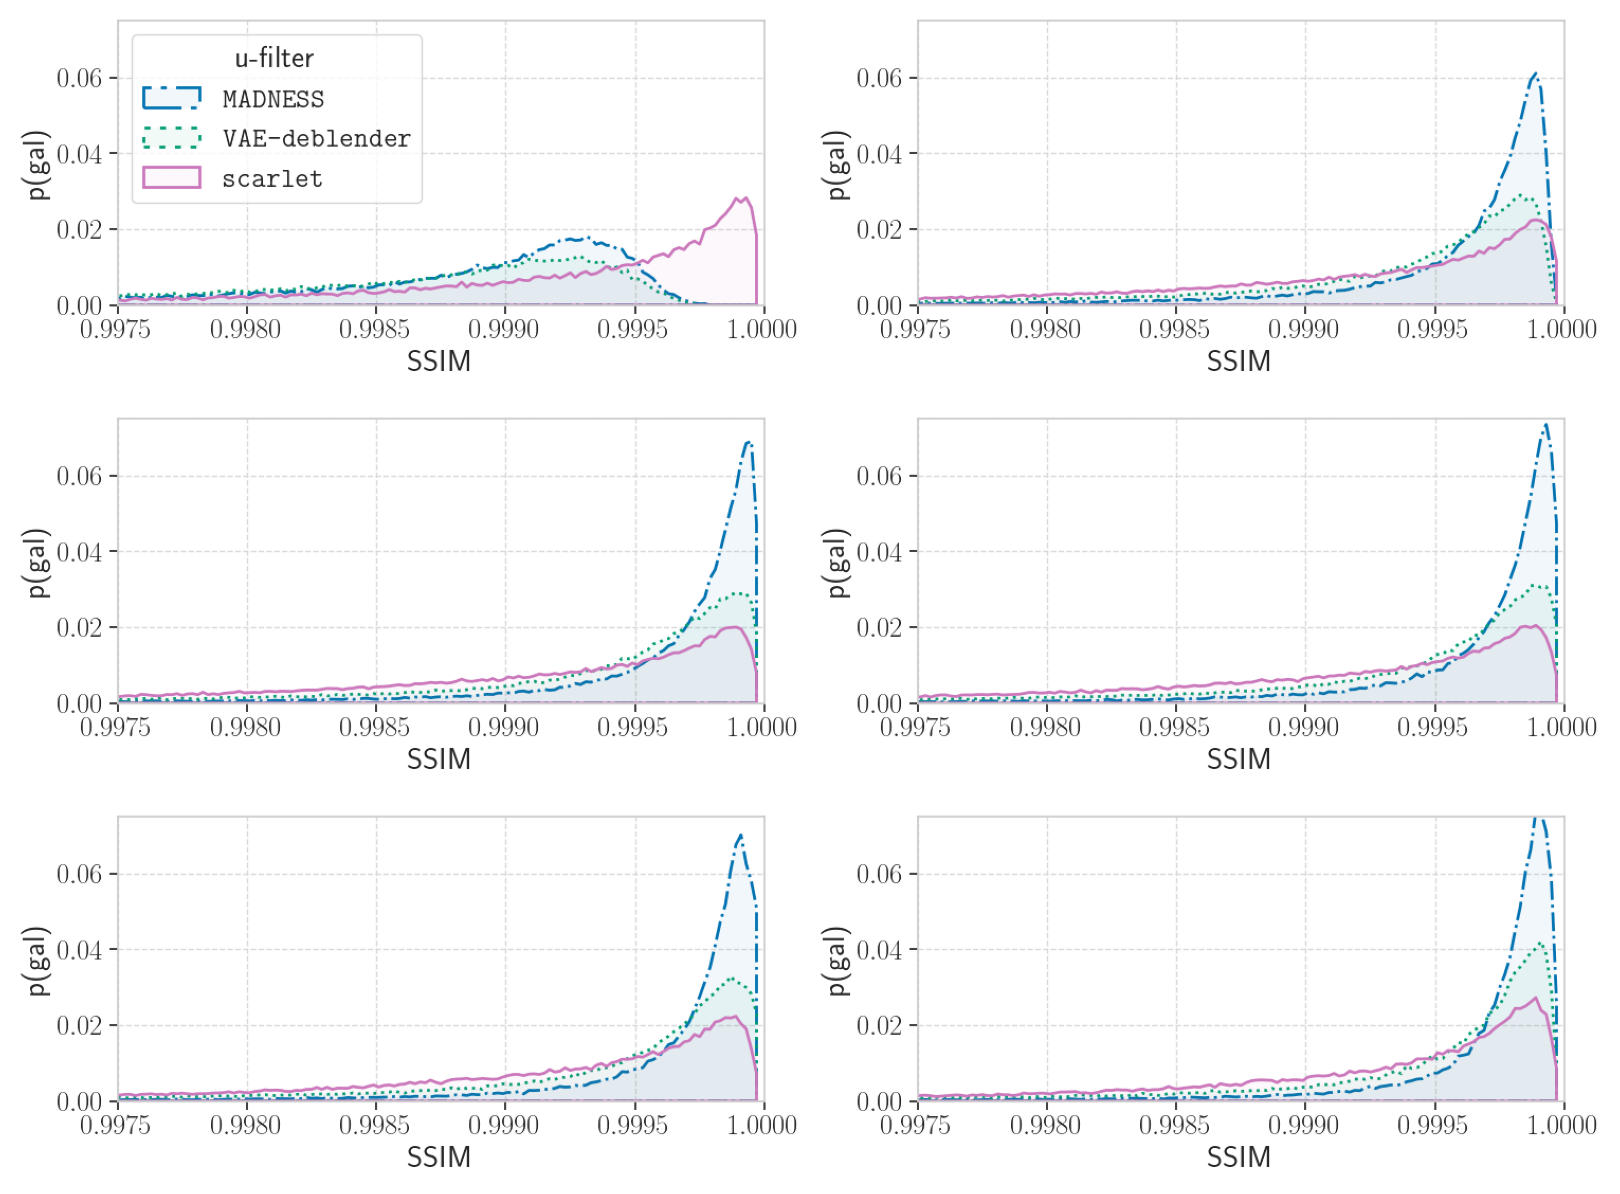

In [ ]:
f, axarr = plt.subplots(3, 2, figsize=(16, 12))

for band_num, band in enumerate(survey.available_filters):
    # axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
    axarr[int(band_num / 2)][band_num % 2].imshow(
        mpimg.imread(
            os.path.join("results", density_level + "_density", f"ssim_res_{band}.png")
        )
    )

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout(pad=0)


plt.savefig(
    os.path.join("results", density_level + "_density", "ssim_res.pdf"),
    format="pdf",
    bbox_inches="tight",
    dpi=1200,
)
plt.savefig(os.path.join("results", density_level + "_density", "ssim_res.png"))

plt.show()

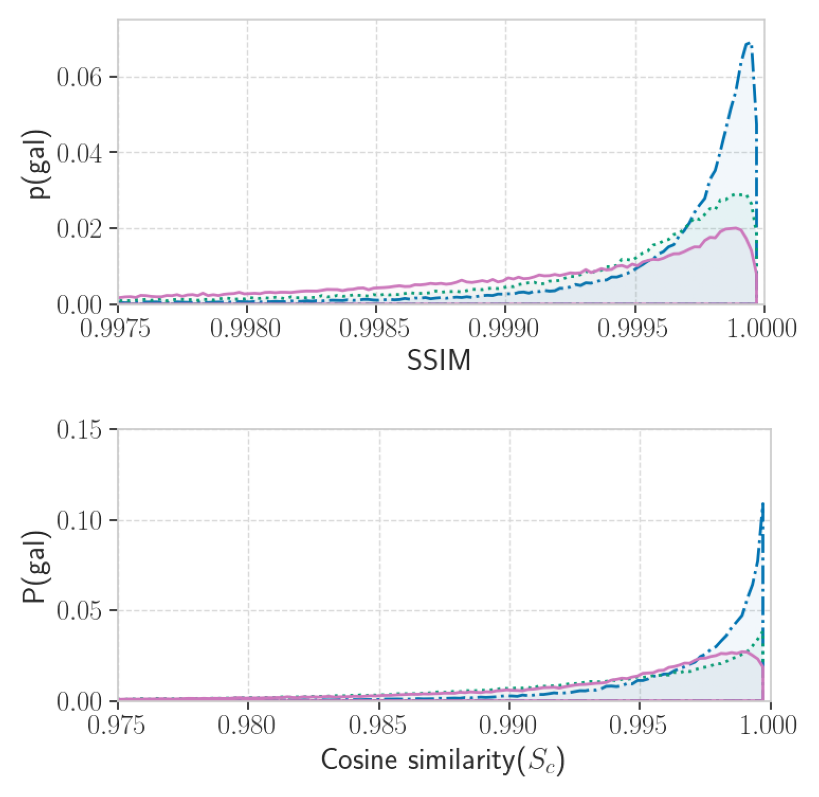

In [ ]:
f, axarr = plt.subplots(2, 1, figsize=(8, 8))


# axarr[0].imshow(mpimg.imread(os.path.join(result_dir_pth, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(
    mpimg.imread(os.path.join("results", density_level + "_density", "ssim_res_r.png"))
)
axarr[1].imshow(
    mpimg.imread(os.path.join("results", density_level + "_density", "cosd_res_r.png"))
)

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
[ax.margins(y=0, x=0) for ax in axarr.ravel()]


plt.tight_layout(pad=0)

plt.savefig(
    "results/" + density_level + "_density/morphology_results.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.savefig("results/" + density_level + "_density/morphology_results.png")

plt.show()

# Relative error in apperture photometry (elliptical apertures)

In [ ]:
for band in survey.available_filters:

    # sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set(font_scale=1.75)
    sns.set_style("whitegrid", {"grid.color": ".85", "grid.linestyle": "--"})
    #     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
    # })
    plt.figure(figsize=(8, 5))
    bins = np.arange(-1, 1, 0.0001)
    mask = (
        actual_photometry[band + "_phot_flux"].values
        / actual_photometry[band + "_phot_fluxerrs"].values
    ) > 5
    x = sns.histplot(
        np.abs(
            madness_results[band + "_phot_flux"].values[mask]
            / actual_photometry[band + "_phot_flux"].values[mask]
            - 1
        ),
        bins=bins,
        stat="density",
        alpha=0.05,
        cumulative=True,
        color=madness_plot_color,
        element="step",
        ls=madness_plot_ls,
        linewidth=2,
        label=madness_plot_label,
    )
    # plt.plot([], [], ls=madness_plot_ls, lw=2, color=madness_plot_color, label=madness_plot_label)

    sns.histplot(
        np.abs(
            debvader_results[band + "_phot_flux"].values[mask]
            / actual_photometry[band + "_phot_flux"].values[mask]
            - 1
        ),
        bins=bins,
        stat="density",
        alpha=0.05,
        cumulative=True,
        color=debvader_plot_color,
        element="step",
        ls=debvader_plot_ls,
        linewidth=2,
        label=debvader_plot_label,
    )
    # plt.plot([], [], ls=debvader_plot_ls, lw=2, color=debvader_plot_color, label=debvader_plot_label)

    sns.histplot(
        np.abs(
            scarlet_results[band + "_phot_flux"].values[mask]
            / actual_photometry[band + "_phot_flux"].values[mask]
            - 1
        ),
        bins=bins,
        stat="density",
        alpha=0.05,
        cumulative=True,
        color=scarlet_plot_color,
        element="step",
        linewidth=2,
        ls=scarlet_plot_ls,
        label=scarlet_plot_label,
    )
    # plt.plot([], [], ls=scarlet_plot_ls, lw=2, color=scarlet_plot_color, label=scarlet_plot_label)

    sns.histplot(
        np.abs(
            blended_photometry[band + "_phot_flux"].values[mask]
            / actual_photometry[band + "_phot_flux"].values[mask]
            - 1
        ),
        bins=bins,
        stat="density",
        alpha=0.05,
        cumulative=True,
        color=blended_plot_color,
        ls=blended_plot_ls,
        linewidth=2,
        element="step",
        label="blended",
    )
    # plt.plot([], [], ls=blended_plot_ls, lw=2, color=blended_plot_color, label="blended")

    ax = plt.gca()
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    # ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([0, 0.1])
    plt.ylim([0.25, 1])
    plt.xlabel(r"$|\delta$(Aperture phot)$|$")
    plt.ylabel("cumulative fraction")
    plt.legend(title=f"{band}-filter", loc="lower right", title_fontsize=20)
    plt.tight_layout()
    plt.savefig(
        "results/" + density_level + "_density/cumulative_distib_phot_err_" + band
    )
    plt.savefig(
        "results/"
        + density_level
        + "_density/cumulative_distib_phot_err_"
        + band
        + ".pdf",
        format="pdf",
        bbox_inches="tight",
    )
    plt.close()

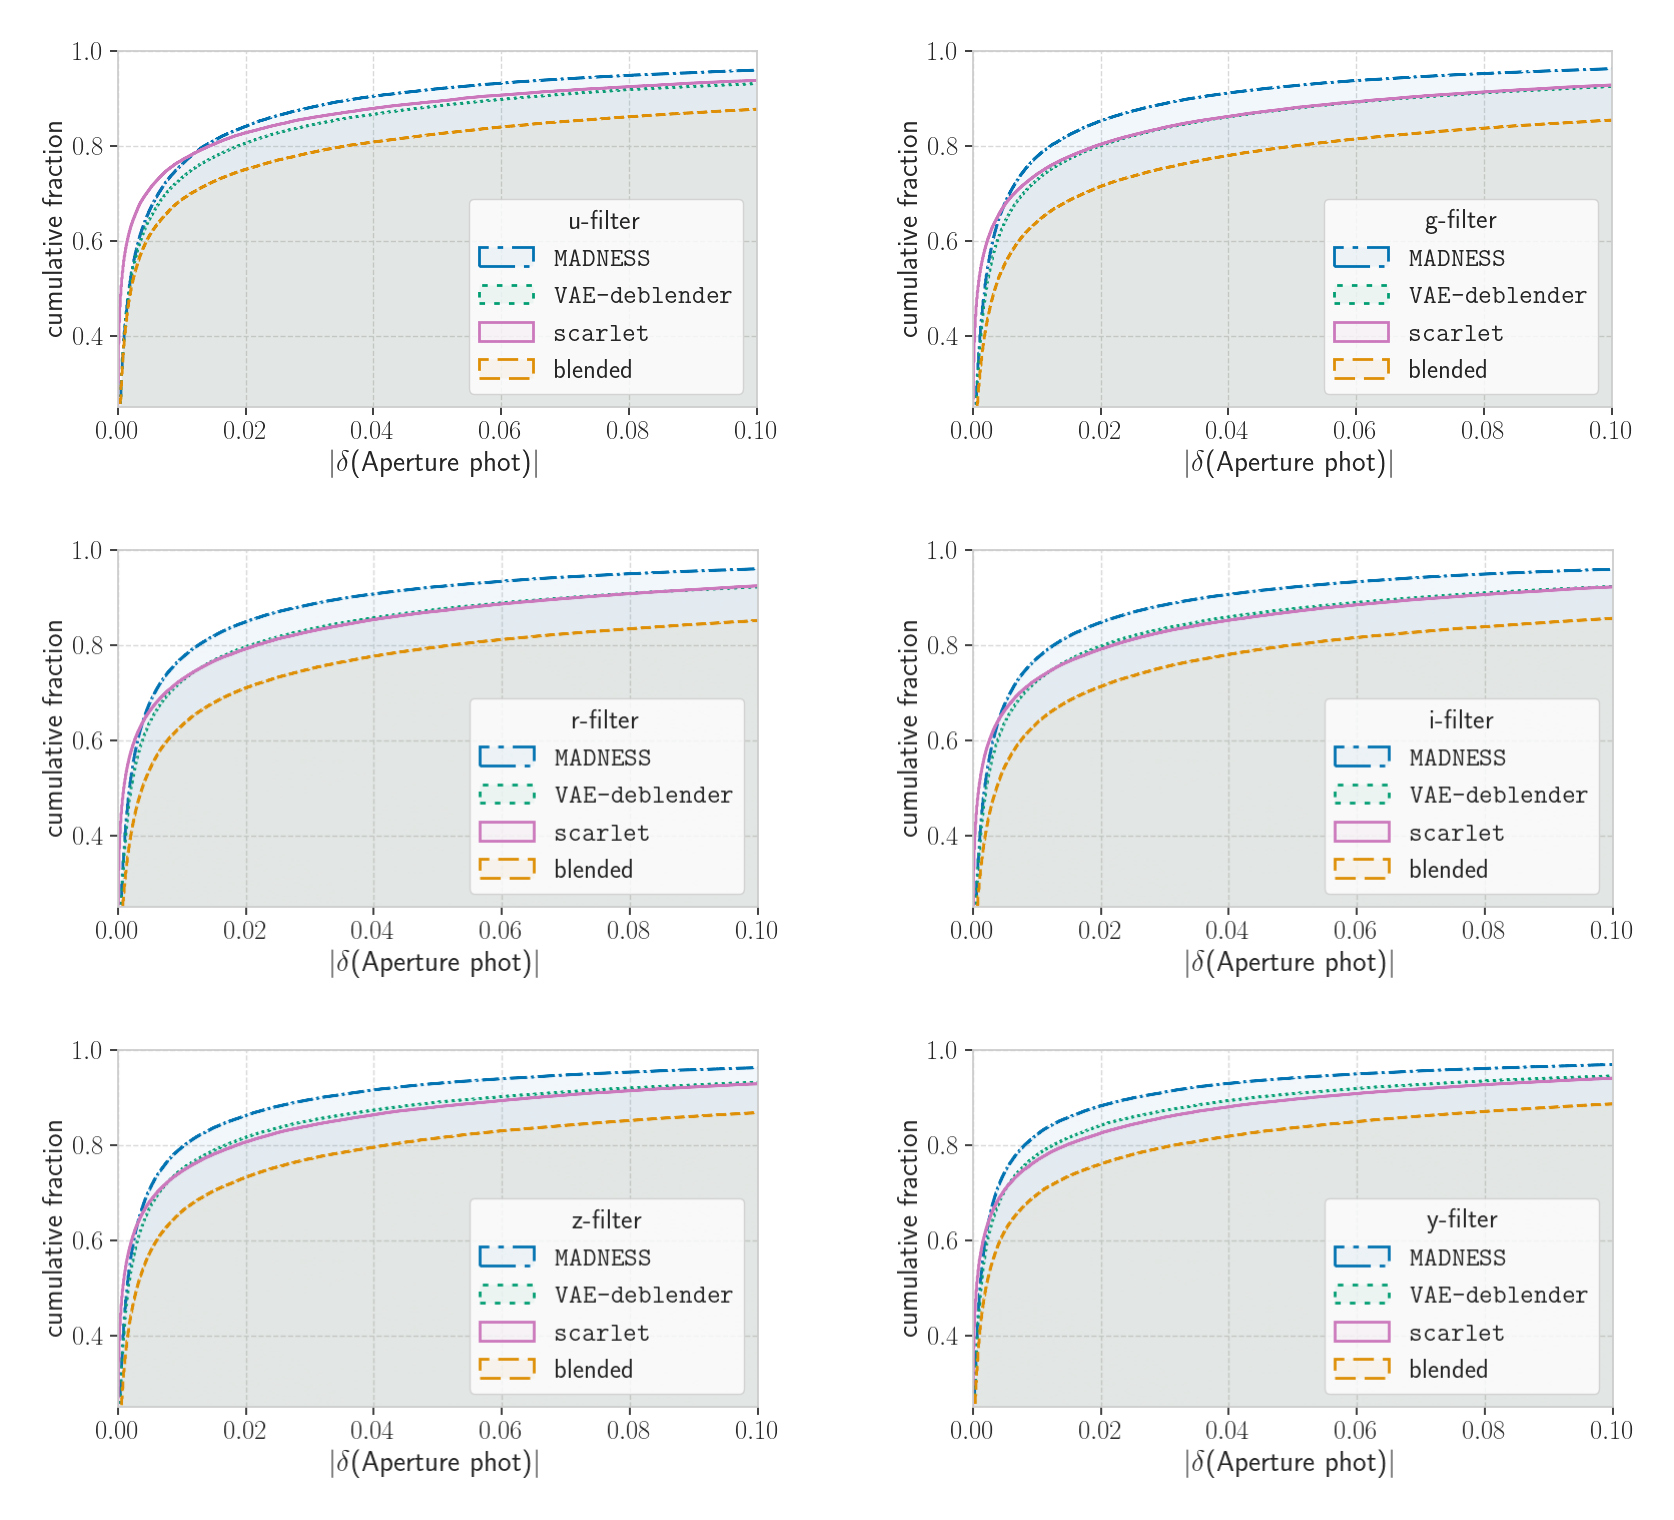

In [ ]:
f, axarr = plt.subplots(3, 2, figsize=(18, 15))

for band_num, band in enumerate(survey.available_filters):
    # axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
    axarr[int(band_num / 2)][band_num % 2].imshow(
        mpimg.imread(
            os.path.join(
                "results",
                f"{density_level}_density/cumulative_distib_phot_err_{band}.png",
            )
        )
    )

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout(pad=0)


plt.savefig(
    os.path.join(
        "results", density_level + "_density", "cumulative_distib_phot_err.pdf"
    ),
    format="pdf",
    bbox_inches="tight",
    dpi=1200,
)
plt.savefig(
    os.path.join(
        "results", density_level + "_density", "cumulative_distib_phot_err.png"
    )
)

plt.show()

# Box plots

SNR definition here is one used to place the SNR>10 cut on the catalog.

In [ ]:
boxplot_snr_df = {}

r_snr_mask = (
    actual_photometry["r_phot_flux"].values
    / actual_photometry["r_phot_fluxerrs"].values
) > 5

# madness_actual_flux = madness_results[band+"_actual_flux"].value
# madness_predicted_flux = madness_results[band+"_predicted_flux"].value

# scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
# scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

# scarlet_relative_difference = np.divide(
#     scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
# )
# madness_relative_difference = np.divide(
#     madness_predicted_flux - madness_actual_flux, madness_actual_flux
# )
boxplot_snr_df["snr"] = list(madness_results["r_band_snr"][r_snr_mask])
boxplot_snr_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
# boxplot_snr_df["r_relative_flux_err"] = list(madness_relative_difference)
boxplot_snr_df["r_relative_flux_err"] = list(
    np.abs(
        madness_results["r_phot_flux"].values[r_snr_mask]
        - actual_photometry["r_phot_flux"].values[r_snr_mask]
    )
    / actual_photometry["r_phot_flux"].values[r_snr_mask]
)


boxplot_snr_df["snr"].extend(list(scarlet_results["r_band_snr"][r_snr_mask]))
boxplot_snr_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_snr_df["r_relative_flux_err"].extend(
    list(
        np.abs(
            scarlet_results["r_phot_flux"].values[r_snr_mask]
            - actual_photometry["r_phot_flux"].values[r_snr_mask]
        )
        / actual_photometry["r_phot_flux"].values[r_snr_mask]
    )
)

boxplot_snr_df = pd.DataFrame(boxplot_snr_df)

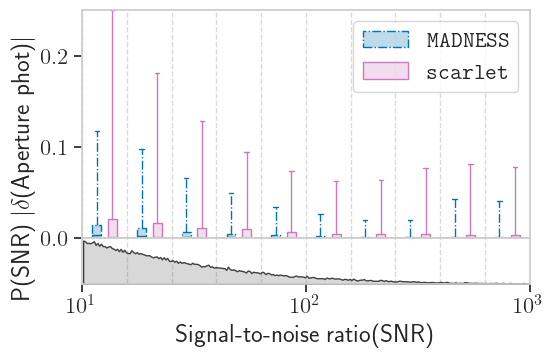

In [ ]:
(
    fig,
    median_fluxerr,
    q1_fluxerr,
    q3_fluxerr,
    whislo_fluxerr,
    whishi_fluxerr,
) = maddeb.boxplot.boxplot_func(
    boxplot_snr_df,
    x="snr",
    y="r_relative_flux_err",
    z="type",
    xlim=(10, 1000),
    ylim=(0, 0.25),
    x_scale="log",
    legend=[madness_plot_label, scarlet_plot_label],
    x_label="Signal-to-noise ratio(SNR)",
    y_label=r"$|\delta$(Aperture phot)$|$",
    y_label_hist="P(SNR)",
    legend_remove=False,
    legend_location="upper right",
    #     x_ticks=[10, 20, 30, 40, 60, 100],
    #     x_ticklabels=[r'$10$', r'$20$', r'$30$', r'$40$', r'$60$', r'$100$'],
    whis=[5, 95],
    percents=[25, 75],
    palette=[madness_plot_color, scarlet_plot_color],  # 0.35,
    ls=[madness_plot_ls, scarlet_plot_ls],
    nbins=10,
    x_major_grid=True,
    sns_font_scale=1.5,
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.png"))

In [ ]:
madness_results

,u_cosd,u_ssim,u_blendedness,g_cosd,g_ssim,g_blendedness,r_cosd,r_ssim,r_blendedness,i_cosd,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.996138,0.999453,0.001075,0.997346,0.999568,0.001551,0.997073,0.999518,0.002528,0.997236,...,4.177191e+04,3385.314683,0,2.878956e+04,3868.829280,0,9.744769e+03,4095.801120,0,0.001494
1,0.984767,0.994460,0.007501,0.998854,0.999592,0.011518,0.999522,0.999693,0.012282,0.999607,...,4.967173e+05,6389.319826,0,4.094918e+05,7416.321374,0,2.208194e+05,7915.768642,0,0.012469
2,0.288979,0.985649,0.062549,0.991930,0.996241,0.020887,0.997515,0.998739,0.012057,0.996779,...,4.658063e+04,5557.844806,0,2.821307e+04,6445.985095,0,2.929341e+04,6886.920907,0,0.005841
3,0.983109,0.998227,0.243462,0.991204,0.999489,0.273820,0.989849,0.999386,0.311372,0.991035,...,4.537337e+04,3803.906302,0,3.203045e+04,4385.052465,0,1.424683e+04,4655.811139,0,0.520180
4,0.976159,0.989793,0.055397,0.999198,0.998982,0.114234,0.999549,0.999614,0.065793,0.999573,...,3.347568e+05,6753.887067,0,2.377766e+05,7836.329386,0,1.339653e+05,8380.241426,0,0.086668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.982008,0.998600,0.033885,0.995154,0.999010,0.046567,0.995859,0.999402,0.048599,0.995264,...,2.290588e+04,3191.502499,0,1.676711e+04,3655.930369,0,5.817559e+03,3870.121993,0,0.059461
305,0.727774,0.955526,0.072228,0.907420,0.958432,0.062242,0.893931,0.957092,0.096305,0.909162,...,4.745613e+04,3561.565934,0,2.472010e+04,4085.317023,0,1.811122e+04,4347.075559,0,0.123139
306,0.985284,0.960123,0.002619,0.997880,0.980285,0.002130,0.998188,0.982376,0.001209,0.998168,...,1.411218e+07,14553.388368,0,1.049015e+07,17014.887752,0,5.554963e+06,18222.735500,0,0.004554
308,0.112208,0.936115,0.483493,0.480245,0.940227,0.486689,0.508873,0.941194,0.629800,0.517663,...,1.180473e+05,7207.023040,0,9.383851e+04,8397.764862,0,4.424102e+04,8980.726951,0,2.665380


In [ ]:
boxplot_blendedness_df = {}

boxplot_blendedness_df["r_blendedness"] = list(
    madness_results["r_blendedness"][r_snr_mask]
)
boxplot_blendedness_df["r_contamination"] = list(
    madness_results["r_contamination"][r_snr_mask]
)
boxplot_blendedness_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
boxplot_blendedness_df["r_relative_flux_err"] = list(
    np.abs(
        madness_results["r_phot_flux"].values[r_snr_mask]
        - actual_photometry["r_phot_flux"].values[r_snr_mask]
    )
    / actual_photometry["r_phot_flux"].values[r_snr_mask]
)


boxplot_blendedness_df["r_blendedness"].extend(
    list(scarlet_results["r_blendedness"][r_snr_mask])
)
boxplot_blendedness_df["r_contamination"].extend(
    list(madness_results["r_contamination"][r_snr_mask])
)
boxplot_blendedness_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_blendedness_df["r_relative_flux_err"].extend(
    list(
        np.abs(
            scarlet_results["r_phot_flux"].values[r_snr_mask]
            - actual_photometry["r_phot_flux"].values[r_snr_mask]
        )
        / actual_photometry["r_phot_flux"].values[r_snr_mask]
    )
)

boxplot_blendedness_df = pd.DataFrame(boxplot_blendedness_df)

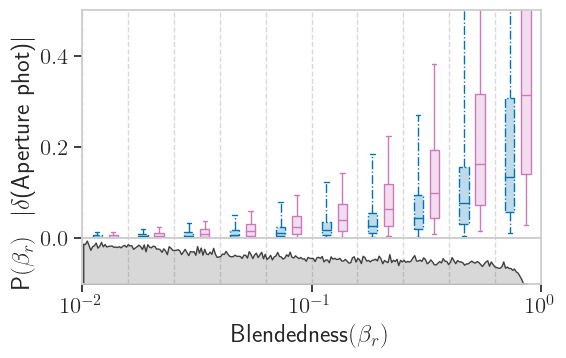

In [ ]:
(
    fig,
    median_shear,
    q1_shear,
    q3_shear,
    whislo_shear,
    whishi_shear,
) = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df,
    x="r_blendedness",
    y="r_relative_flux_err",
    z="type",
    xlim=(1e-2, 1),
    ylim=(-0, 0.5),
    x_scale="log",
    legend=[madness_plot_label, scarlet_plot_label],
    x_label=r"Blendedness$(\beta_r)$",
    y_label=r"$|\delta$(Aperture phot)$|$",
    y_label_hist=r"P$(\beta_r)$",
    legend_remove=True,
    whis=[5, 95],
    percents=[25, 75],
    palette=[madness_plot_color, scarlet_plot_color],  # 0.35,
    ls=[madness_plot_ls, scarlet_plot_ls],
    nbins=10,
    x_major_grid=True,
    sns_font_scale=1.5,
)
plt.savefig(
    os.path.join("results", density_level + "_density", "blendedness_box_plot.pdf")
)
plt.savefig(
    os.path.join("results", density_level + "_density", "blendedness_box_plot.png")
)

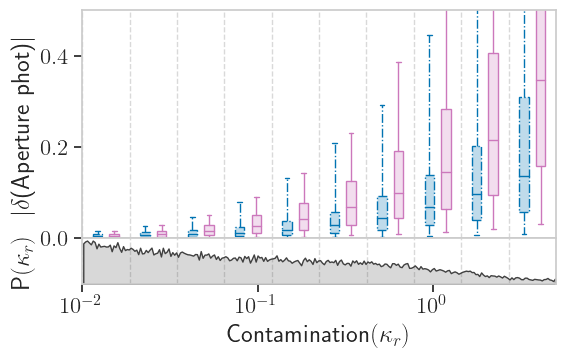

In [ ]:
(
    fig,
    median_shear,
    q1_shear,
    q3_shear,
    whislo_shear,
    whishi_shear,
) = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df,
    x="r_contamination",
    y="r_relative_flux_err",
    z="type",
    xlim=(1e-2, 5),
    ylim=(0, 0.5),
    x_scale="log",
    legend=[madness_plot_label, scarlet_plot_label],
    x_label=r"Contamination$(\kappa_r)$",
    y_label=r"$|\delta$(Aperture phot)$|$",
    y_label_hist=r"P$(\kappa_r)$",
    legend_remove=True,
    whis=[5, 95],
    percents=[25, 75],
    palette=[madness_plot_color, scarlet_plot_color],  # 0.35,
    ls=[madness_plot_ls, scarlet_plot_ls],
    nbins=10,
    sns_font_scale=1.5,
)
plt.savefig(
    os.path.join("results", density_level + "_density", "contamination_box_plot.pdf")
)
plt.savefig(
    os.path.join("results", density_level + "_density", "contamination_box_plot.png")
)

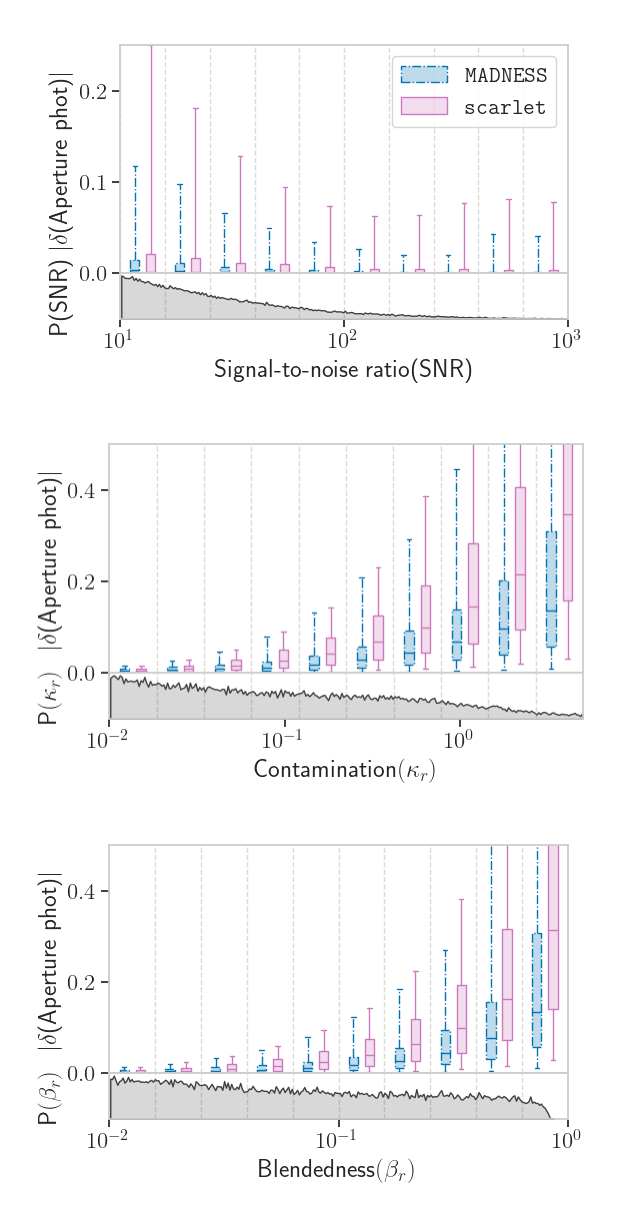

In [ ]:
f, axarr = plt.subplots(3, 1, figsize=(6, 12))


# axarr[0].imshow(mpimg.imread(os.path.join(result_dir_pth, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(
    mpimg.imread(
        os.path.join("results", density_level + "_density", "snr_box_plot.png")
    )
)
axarr[1].imshow(
    mpimg.imread(
        os.path.join(
            "results", density_level + "_density", "contamination_box_plot.png"
        )
    )
)
axarr[2].imshow(
    mpimg.imread(
        os.path.join("results", density_level + "_density", "blendedness_box_plot.png")
    )
)

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
[ax.margins(y=0, x=0) for ax in axarr.ravel()]


plt.tight_layout(pad=0)

plt.savefig(
    "results/" + density_level + "_density/boxplot_results.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.savefig("results/" + density_level + "_density/boxplot_results.png")

plt.show()